In [4]:
%matplotlib notebook

In [5]:
import numpy as np
from scipy import sparse
from time import time
import pandas as pd
import networkx as nx
import graph_tool as gt
import matplotlib.pyplot as plt
import seaborn as sns
import json
import regex as re
from pathlib import Path
from copy import deepcopy
from importlib import reload
from collections import Counter, defaultdict

In [6]:
import analysis
import files
import grouping

In [7]:
reload(files)

<module 'files' from '/home/rimov/Documents/Code/Studies/reddit-assortativity-analysis/files.py'>

In [8]:
plt.rcParams.update({'axes.titlesize': 'large'})
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [9]:
paths = files.get_network_paths()
paths

{'TheRedPill': PosixPath('data/chain-networks/TheRedPill.json'),
 'ketorecipes': PosixPath('data/chain-networks/ketorecipes.json'),
 'gameofthrones': PosixPath('data/chain-networks/gameofthrones.json'),
 'aggies': PosixPath('data/chain-networks/aggies.json'),
 'Rateme': PosixPath('data/chain-networks/Rateme.json'),
 'answers': PosixPath('data/chain-networks/answers.json'),
 'ABraThatFits': PosixPath('data/chain-networks/ABraThatFits.json'),
 'Warhammer40k': PosixPath('data/chain-networks/Warhammer40k.json'),
 'networking': PosixPath('data/chain-networks/networking.json'),
 'dataisbeautiful': PosixPath('data/chain-networks/dataisbeautiful.json'),
 'AsianHotties': PosixPath('data/chain-networks/AsianHotties.json'),
 'StonerPhilosophy': PosixPath('data/chain-networks/StonerPhilosophy.json'),
 'NewSkaters': PosixPath('data/chain-networks/NewSkaters.json'),
 'Scotland': PosixPath('data/chain-networks/Scotland.json'),
 'homelab': PosixPath('data/chain-networks/homelab.json'),
 'Blowjobs': Po

In [10]:
groups = files.get_groups()
groups.keys()

dict_keys(['fashion', 'market', 'media', 'sports', 'medical', 'politics', 'professional', 'sexual', 'other', 'science', 'violent', 'health_fitness', 'travel', 'philosophy', 'books_comics', 'personal', 'tech', 'news', 'vehicles', 'music', 'religion', 'video_games', 'food', 'education', 'geography', 'comedy', 'q_and_a', 'hobbies', 'animals', 'stories'])

In [11]:
m,a,c = grouping.get_missing_added_changed(set(paths.keys()), groups)

In [12]:
groups_clean = grouping.remove_subreddits(groups, a)
groups_clean = grouping.correct_subreddits_spelling(groups_clean, c)
groups_clean

Replacing (linuxactionshow) -> ({'LinuxActionShow'})
Replacing (Skyrimmods) -> ({'skyrimmods'})
Replacing (Summonerschool) -> ({'summonerschool'})
Replacing (AoE2) -> ({'aoe2'})
Replacing (Patientgamers) -> ({'patientgamers'})
Replacing (Europe) -> ({'europe'})
Replacing (Australia) -> ({'australia'})
Replacing (prettygirls) -> ({'PrettyGirls'})
Replacing (casualpokemontrades) -> ({'CasualPokemonTrades'})
Replacing (MTurk) -> ({'mturk'})
Replacing (Climbing) -> ({'climbing'})
Replacing (Pkmntcg) -> ({'pkmntcg'})
Replacing (Wallpapers) -> ({'wallpapers'})
Replacing (Puppy101) -> ({'puppy101'})
Replacing (stacked) -> ({'Stacked'})
Replacing (Hometheater) -> ({'hometheater'})


{'fashion': ['supremeclothing',
  'MaleFashionMarket',
  'malefashionadvice',
  'burstingout',
  'BeautyBoxes',
  'braswap',
  'ABraThatFits',
  'TeenMFA',
  'malehairadvice',
  'caps',
  'piercing',
  'asianamerican',
  'MakeupAddiction',
  'malefashion',
  'curvy',
  'tightdresses',
  'Hair',
  'Sneakers',
  'AsianBeauty',
  'BeardPorn',
  'frugalmalefashion',
  'entwives',
  'FancyFollicles',
  'TF2fashionadvice',
  'MakeupAddicts',
  'malegrooming',
  'SkincareAddiction',
  'femalefashionadvice',
  'AustralianMakeup',
  'streetwear'],
 'market': ['CryptoCurrency',
  'VapePorn',
  'BitcoinMarkets',
  'GameTrade',
  'mtgfinance',
  'vaporents',
  'ACTrade',
  'Random_Acts_Of_Pizza',
  'Ebay',
  'retrogameswap',
  'freedonuts',
  'eFreebies',
  'forhire',
  'Foodforthought',
  'investing',
  'Shave_Bazaar',
  'kickstarter',
  'Dota2Trade',
  'buildapcsales',
  'RBA',
  'business',
  'Bitcoin',
  'churning',
  'beermoney',
  'giftcardexchange',
  'Flipping',
  'SteamGameSwap',
  'small

In [13]:
PATH_GROUPS_CLEAN = files.PATH_DATA/'subreddits-grouped-clean.json'

with open(PATH_GROUPS_CLEAN, 'w') as f:
    json.dump(groups_clean, f)

### Getting Network Info

In [14]:
groups = files.get_network_paths_grouped(PATH_GROUPS_CLEAN)
groups

{'fashion': {('ABraThatFits',
   PosixPath('data/chain-networks/ABraThatFits.json')),
  ('AsianBeauty', PosixPath('data/chain-networks/AsianBeauty.json')),
  ('AustralianMakeup', PosixPath('data/chain-networks/AustralianMakeup.json')),
  ('BeardPorn', PosixPath('data/chain-networks/BeardPorn.json')),
  ('BeautyBoxes', PosixPath('data/chain-networks/BeautyBoxes.json')),
  ('FancyFollicles', PosixPath('data/chain-networks/FancyFollicles.json')),
  ('Hair', PosixPath('data/chain-networks/Hair.json')),
  ('MakeupAddiction', PosixPath('data/chain-networks/MakeupAddiction.json')),
  ('MakeupAddicts', PosixPath('data/chain-networks/MakeupAddicts.json')),
  ('MaleFashionMarket',
   PosixPath('data/chain-networks/MaleFashionMarket.json')),
  ('SkincareAddiction',
   PosixPath('data/chain-networks/SkincareAddiction.json')),
  ('Sneakers', PosixPath('data/chain-networks/Sneakers.json')),
  ('TF2fashionadvice', PosixPath('data/chain-networks/TF2fashionadvice.json')),
  ('TeenMFA', PosixPath('data/

<code>
net_desc = pd.DataFrame()
for g, sr in groups.items():
    desc = dict()
    for n, p in sr:
        _, net = analysis.nx_digraph_from_path(n, p)
        desc[n] = {'category': g, 'nodes': net.number_of_nodes(), 'edges': net.number_of_edges(), 'density': nx.density(net)}
#         net_desc[g][n] = (net.number_of_nodes(), net.number_of_edges())
    desc = pd.DataFrame.from_dict(desc, orient='index')
    net_desc = pd.concat([net_desc, desc], axis=0, ignore_index=False)
</code>

In [107]:
net_desc = pd.read_csv(files.PATH_DATA/'net-basic-desc.csv')

In [108]:
net_desc.head()

,subreddit,category,nodes,edges,density
0,TF2fashionadvice,fashion,2155,4416,0.000951
1,piercing,fashion,4182,9251,0.000529
2,malehairadvice,fashion,7615,13242,0.000228
3,Hair,fashion,2890,4793,0.000574
4,BeautyBoxes,fashion,2337,6037,0.001106


<code>
net_desc.to_csv(files.PATH_DATA/'net-basic-desc.csv', index=False)
</code

In [18]:
net_desc['category'].value_counts()

video_games       229
hobbies           204
other             195
sports            135
tech              121
sexual            116
media             115
personal          110
professional      101
geography          97
comedy             88
travel             82
music              76
q_and_a            75
politics           72
news               62
science            59
vehicles           59
market             54
education          50
health_fitness     49
stories            47
books_comics       44
violent            44
animals            43
food               42
medical            36
fashion            30
religion           29
philosophy         29
Name: category, dtype: int64

<IPython.core.display.Javascript object>


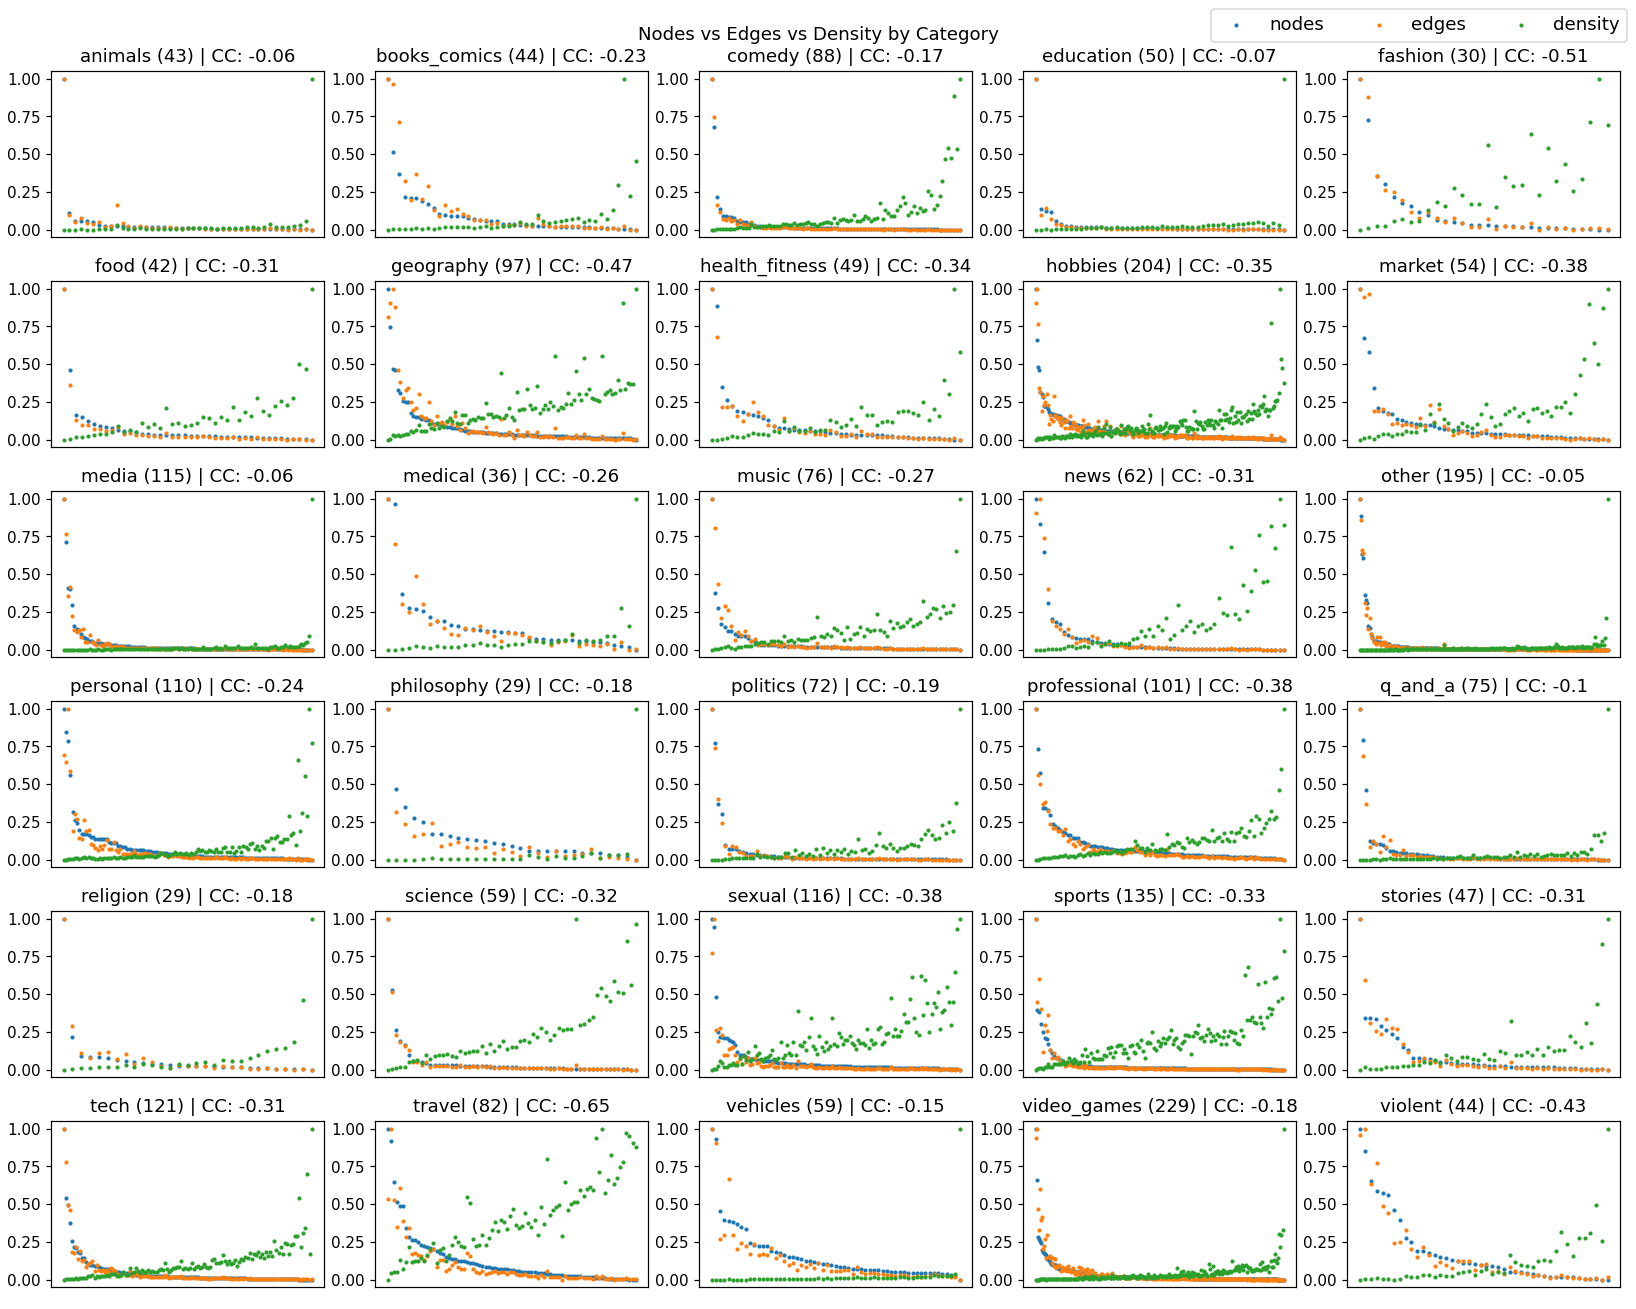

In [19]:
fig = plt.figure(figsize=(15,12), layout='constrained')

In [20]:
grouped = net_desc.groupby('category')

In [21]:
plt.clf()

fig.suptitle(f'Nodes vs Edges vs Density by Category')
dot_size = 3.0

for i, (cat, data) in enumerate(grouped):
    # Normalize the subreddit nodes/edges to [0,1] range within each category
    d_st = data.iloc[:, 1:].apply(lambda x: (x - x.min())/(x.max() - x.min()))
    
    ax = fig.add_subplot(6,5,i+1)
    
    # Get the nodes-density Pearson correlation coefficient
    corr = data.corr(numeric_only=True).loc['density', 'nodes']
    
    ax.set_title(f'{cat} ({data.shape[0]}) | CC: {round(corr, 2)}')
    ax.set_xticks([])
    ax.set_xlabel('')
    
    dsort = d_st.sort_values('nodes', ascending=False)
    x = list(range(dsort.shape[0]))
    if i == 0:
        ax.scatter(x, dsort['nodes'], s=dot_size, label='nodes')
        ax.scatter(x, dsort['edges'], s=dot_size, label='edges')
        ax.scatter(x, dsort['density'], s=dot_size, label='density')
    else:
        ax.scatter(x, dsort['nodes'], s=dot_size)
        ax.scatter(x, dsort['edges'], s=dot_size)
        ax.scatter(x, dsort['density'], s=dot_size)

fig.tight_layout()
fig.legend(ncols=3, fontsize='large')
plt.show()

<code>
plt.savefig(files.PATH_IMG/'nodes-edges-density.png')
</code>

### Correlations Nodes vs Density
From the plots, it looks like some categories exhibit inverse correlation between nodes/edges and density. Adding the values to plots to better show.

In [22]:
node_dens_corr = dict()

for cat, data in grouped:
    corr = data.corr(numeric_only=True)
    node_dens_corr[cat] = corr.loc['density', 'nodes']

In [23]:
node_dens_corr = sorted(node_dens_corr.items(), key=lambda x: x[1])
node_dens_corr

[('travel', -0.6459576298478372),
 ('fashion', -0.5101116270783331),
 ('geography', -0.46985419818120056),
 ('violent', -0.43151212831443686),
 ('market', -0.3806415345513107),
 ('professional', -0.38026924931573564),
 ('sexual', -0.3795948904497009),
 ('hobbies', -0.35451771680106686),
 ('health_fitness', -0.344857312703119),
 ('sports', -0.32568137519771984),
 ('science', -0.3191342162436278),
 ('stories', -0.3139349304429053),
 ('news', -0.3087946802663034),
 ('tech', -0.30697926396740144),
 ('food', -0.30603186059042836),
 ('music', -0.27126199719628497),
 ('medical', -0.2568343534324231),
 ('personal', -0.24374287185780377),
 ('books_comics', -0.23099019905088203),
 ('politics', -0.18556305940419435),
 ('philosophy', -0.1800024904335199),
 ('religion', -0.17764052558438928),
 ('video_games', -0.176484746740813),
 ('comedy', -0.17297474652824055),
 ('vehicles', -0.1518105917230645),
 ('q_and_a', -0.10171156623319408),
 ('education', -0.06947576598205406),
 ('media', -0.062208367422

<IPython.core.display.Javascript object>


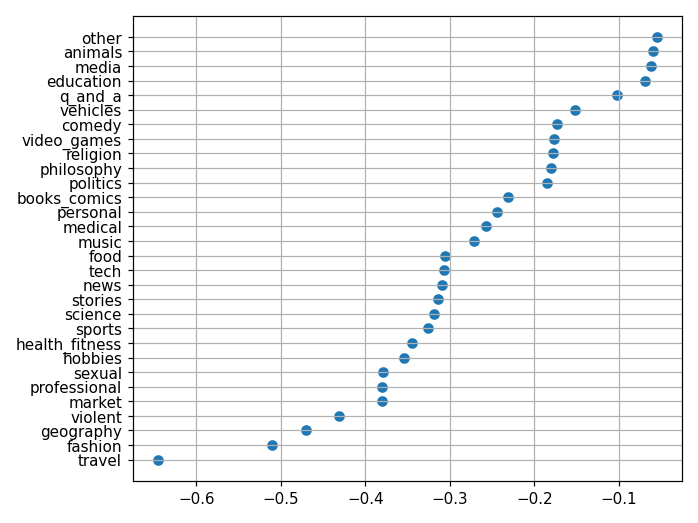

In [24]:
fig, ax = plt.subplots(1,1)

In [25]:
cats = [d[0] for d in node_dens_corr]
corrs = [d[1] for d in node_dens_corr]

In [26]:
plt.cla()
ax.scatter(corrs, cats)
# ax.set_yticklabels(c, rotation=90)

fig.tight_layout()
plt.grid()
plt.show()

<code>
plt.savefig(files.PATH_IMG/'node-dens-correlation.png')
</code>

### NOTE:
Noticing that the correlation coefficients can be partitioned by magnitude, with large "gaps" between the groups **eg. between market and violent**. In some cases, similar categories **eg. philosophy, religion** have similar values. 

## Getting Random Samples

Let's get representative samples from above categories that can perhaps answer for the differences in the groupings. 

#### NOTE:
Every subreddit found in 'other' category is also present in at least 1 other group, so for analysis purposes will avoid running methods on 'other' as the subreddits have no common correlation.

### Identifying multi-category subreddits



In [109]:
# drop the 'other' column; not relevant to study
other = net_desc[net_desc['category'] == 'other']
net_desc = net_desc.drop(index=other.index).reset_index(drop=True)
net_desc

,subreddit,category,nodes,edges,density
0,TF2fashionadvice,fashion,2155,4416,0.000951
1,piercing,fashion,4182,9251,0.000529
2,malehairadvice,fashion,7615,13242,0.000228
3,Hair,fashion,2890,4793,0.000574
4,BeautyBoxes,fashion,2337,6037,0.001106
...,...,...,...,...,...
2293,shittydarksouls,stories,875,1997,0.002611
2294,behindthegifs,stories,8741,17581,0.000230
2295,Thetruthishere,stories,2223,4537,0.000919
2296,nosleep,stories,36349,86243,0.000065


In [110]:
multi = net_desc[net_desc.duplicated('subreddit', keep=False)].sort_values('subreddit')
multi

,subreddit,category,nodes,edges,density
1953,911truth,q_and_a,810,2281,0.003481
389,911truth,politics,810,2281,0.003481
1857,AdviceAnimals,comedy,455065,1498485,0.000007
1978,AdviceAnimals,q_and_a,455065,1498485,0.000007
1744,Albany,geography,1093,2636,0.002209
...,...,...,...,...,...
2123,woodworking,hobbies,13419,35385,0.000197
1233,worldnews,news,307758,1194789,0.000013
410,worldnews,politics,307758,1194789,0.000013
794,yoga,health_fitness,4150,8425,0.000489


In [123]:
multi = multi.loc[:, ['subreddit', 'category']].groupby('subreddit').agg(lambda x: ', '.join([i for i in x])).reset_index()
multi

,subreddit,category
0,911truth,"q_and_a, politics"
1,AdviceAnimals,"comedy, q_and_a"
2,Albany,"geography, travel"
3,AndroidQuestions,"tech, professional"
4,AnimeSketch,"hobbies, media"
...,...,...
226,wikipedia,"education, stories"
227,wine,"food, hobbies"
228,woodworking,"professional, hobbies"
229,worldnews,"news, politics"


In [137]:
srs = set(multi['subreddit'].unique())
cats = set(net_desc['category'].unique())

### 

In [139]:
print(cats)

{'tech', 'q_and_a', 'philosophy', 'food', 'fashion', 'sexual', 'personal', 'politics', 'travel', 'education', 'health_fitness', 'market', 'medical', 'science', 'news', 'animals', 'hobbies', 'comedy', 'media', 'stories', 'violent', 'professional', 'sports', 'vehicles', 'books_comics', 'music', 'video_games', 'religion', 'geography'}


In [135]:
print(srs)

{'AdviceAnimals', 'patientgamers', 'portugal', 'Maplestory', 'magicTCG', 'raspberry_pi', 'AskSocialScience', 'wine', 'audiophile', 'skeptic', 'webcomics', 'whowouldwin', 'hometheater', 'montreal', '911truth', 'PrettyGirls', 'rant', 'vinyl', 'Delaware', 'lacrosse', 'fatpeoplestories', 'news', 'pcmasterrace', 'geology', 'pcgaming', 'circlebroke2', 'Iceland', 'fantasyfootball', 'shortscarystories', 'indieheads', 'Bass', 'whatsthisbug', 'ShingekiNoKyojin', 'AnimeSketch', 'drunk', 'Fishing', 'AskTechnology', 'chicago', 'AskPhysics', 'Sneakers', 'tf2', 'tipofmypenis', 'Brazil', 'Tucson', 'shanghai', 'toosoon', 'Naruto', 'changemyview', 'SaltLakeCity', 'MMFB', 'opieandanthony', 'europe', 'AskElectronics', 'EnoughLibertarianSpam', 'canadaguns', 'northernireland', 'chemistry', 'TheSimpsons', 'TalesFromThePizzaGuy', 'snowboarding', 'mylittlepony', 'newzealand', 'anonymous', 'celebnsfw', 'AskScienceDiscussion', 'LetsNotMeet', 'Marvel', 'WatchItForThePlot', 'StonerPhilosophy', 'photography', 'wiki